In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.model_selection import train_test_split
import keras
import sys
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model
import time
import itertools

In [258]:
df_0 = pd.read_csv('/home/sbml/nicer/220517peak_new/data/df_for_CNN_TF.csv')
df_0.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'location', 'S1_plus', 'S1_minus',
       'S2_plus', 'S2_minus', 'Label_TF', 'Label_size', 'data', 'img_raw',
       'resized_img', 'Label_new'],
      dtype='object')

In [259]:
set(df_0['data'].tolist())

{'RpoD', 'RpoH_heat', 'RpoH_noheat', 'RpoN', 'RpoS'}

In [303]:
df_T = df_0[df_0['Label_TF'] == 1]
df_F = df_0[df_0['Label_TF'] == 0]

df_F1 = df_F.sample(frac = 0.09)
df = pd.concat([df_T, df_F1])
df

,Unnamed: 0,Unnamed: 0.1,location,S1_plus,S1_minus,S2_plus,S2_minus,Label_TF,Label_size,data,img_raw,resized_img,Label_new
0,0,0,NC_000913-156,"[555.0, 558.0, 568.0, 536.0, 510.0, 494.0, 487...","[81.0, 82.0, 83.0, 81.0, 73.0, 72.0, 71.0, 69....","[528.0, 529.0, 540.0, 506.0, 502.0, 498.0, 501...","[83.0, 83.0, 85.0, 86.0, 80.0, 84.0, 85.0, 81....",1,3,RpoD,"[[0.21309192200557103, 0.00958083832335329, 0....","[[0.21309192200557103, 0.00958083832335329, 0....",1
10,10,10,NC_000913-5665,"[5.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, ...","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, ...","[9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, ...",1,1,RpoD,"[[0.07407407407407407, 0.08823529411764705, 0....","[[0.07407407407407407, 0.08823529411764705, 0....",0
12,12,12,NC_000913-6489,"[6.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, ...","[6.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[1.0, 1.0, 2.0, 2.0, 2.0, 5.0, 5.0, 6.0, 6.0, ...",1,1,RpoD,"[[0.12195121951219515, 0.1176470588235294, 0.0...","[[0.12195121951219515, 0.1176470588235294, 0.0...",0
15,15,15,NC_000913-8203,"[38.0, 38.0, 38.0, 38.0, 36.0, 36.0, 35.0, 35....","[13.0, 13.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13....","[34.0, 33.0, 32.0, 32.0, 30.0, 30.0, 30.0, 30....","[19.0, 19.0, 20.0, 22.0, 18.0, 17.0, 18.0, 18....",1,2,RpoD,"[[0.10847457627118644, 0.0028409090909090953, ...","[[0.10847457627118644, 0.0028409090909090953, ...",1
21,21,21,NC_000913-10565,"[10.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.0, 15....","[7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...","[8.0, 8.0, 8.0, 8.0, 8.0, 12.0, 9.0, 9.0, 11.0...","[7.0, 7.0, 7.0, 7.0, 8.0, 9.0, 9.0, 9.0, 9.0, ...",1,1,RpoD,"[[0.21052631578947367, 0.17241379310344826, 0....","[[0.21052631578947367, 0.17241379310344826, 0....",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23208,23208,5704,NC_000913-3160758,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17....",0,0,RpoH_noheat,"[[0.0, 0.0, 1.0, 0.7391304347826086], [0.0, 0....","[[0.0, 0.0, 1.0, 0.7391304347826086], [0.0, 0....",0
23853,23853,6349,NC_000913-3514243,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.0, 9.0, 9.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,RpoH_noheat,"[[0.0, 0.0, 0.0, 0.4090909090909091], [0.0, 0....","[[0.0, 0.0, 0.0, 0.4090909090909091], [0.0, 0....",0
22689,22689,5185,NC_000913-2868914,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 8.0, 8.0, 8.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",0,0,RpoH_noheat,"[[0.0, 0.0, 0.625, 1.0], [0.0, 0.0, 0.625, 1.0...","[[0.0, 0.0, 0.625, 1.0], [0.0, 0.0, 0.625, 1.0...",0
21076,21076,3572,NC_000913-1980092,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,RpoH_noheat,"[[0.0, 0.0, 0.8333333333333333, 0.0], [0.0, 0....","[[0.0, 0.0, 0.8333333333333333, 0.0], [0.0, 0....",0


In [304]:
X_all = [eval(i) for i in df['resized_img'].tolist()]
X_all = np.array(X_all)

In [305]:
y = np.array(df['Label_TF'].tolist())

In [306]:
x_train, x_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.3)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.3)
x_train.shape

(4659, 256, 4)

In [307]:
rows = len(X_all[0])
cols = 4
input_shape = (rows, cols, 1)
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
x_valid = x_valid.reshape(x_valid.shape[0], rows, cols, 1)

x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32')/255.0
x_valid = x_valid.astype('float32')/255.0

y_train = keras.utils.np_utils.to_categorical(y_train, 2)   
y_test = keras.utils.np_utils.to_categorical(y_test, 2)
y_valid = keras.utils.np_utils.to_categorical(y_valid, 2)


batch_size = 128
num_classes = 2
x_test.shape

(600, 256, 4, 1)

In [308]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size = (5,5), strides = (1,1), padding = 'same', activation = 'relu', input_shape = input_shape))

model_cnn.add(Conv2D(32, kernel_size = (5,5), strides = (1,1), padding = 'same', activation = 'relu', input_shape = input_shape))

model_cnn.add(MaxPooling2D(pool_size = (2,2), strides = (1,1)))

model_cnn.add(Conv2D(32, (5,5), activation = 'relu', padding = 'same'))

model_cnn.add(Conv2D(32, (5,5), activation = 'relu', padding = 'same'))

model_cnn.add(MaxPooling2D(pool_size = (2,2)))


model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation = 'relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_classes, activation = 'softmax'))
model_cnn.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132 (Conv2D)         (None, 256, 4, 32)        832       
                                                                 
 conv2d_133 (Conv2D)         (None, 256, 4, 32)        25632     
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 255, 3, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_134 (Conv2D)         (None, 255, 3, 32)        25632     
                                                                 
 conv2d_135 (Conv2D)         (None, 255, 3, 32)        25632     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 127, 1, 32)       0         
 g2D)                                                

In [309]:
epochs = 40

start = time.time()
print('start time : ' , start)
model_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist2 = model_cnn.fit(x_train, y_train, epochs = epochs, verbose = 1, validation_data = (x_valid, y_valid))
score = model_cnn.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
end = time.time()
print('end time : ', end)
print('tot time : ', end-start)

start time :  1652762404.0710878
Epoch 1/40
146/146 [==============================] - 1s 5ms/step - loss: 0.6758 - accuracy: 0.5727 - val_loss: 0.2669 - val_accuracy: 0.8991
Epoch 2/40
146/146 [==============================] - 1s 4ms/step - loss: 0.2550 - accuracy: 0.9137 - val_loss: 0.1997 - val_accuracy: 0.9406
Epoch 3/40
146/146 [==============================] - 1s 4ms/step - loss: 0.2152 - accuracy: 0.9322 - val_loss: 0.2035 - val_accuracy: 0.9313
Epoch 4/40
146/146 [==============================] - 1s 4ms/step - loss: 0.2110 - accuracy: 0.9307 - val_loss: 0.1850 - val_accuracy: 0.9392
Epoch 5/40
146/146 [==============================] - 1s 4ms/step - loss: 0.1964 - accuracy: 0.9352 - val_loss: 0.1876 - val_accuracy: 0.9392
Epoch 6/40
146/146 [==============================] - 1s 4ms/step - loss: 0.1736 - accuracy: 0.9408 - val_loss: 0.1651 - val_accuracy: 0.9442
Epoch 7/40
146/146 [==============================] - 1s 4ms/step - loss: 0.1669 - accuracy: 0.9412 - val_loss: 0.1

Text(0.5, 1.0, 'cnn_epoch40_loss')

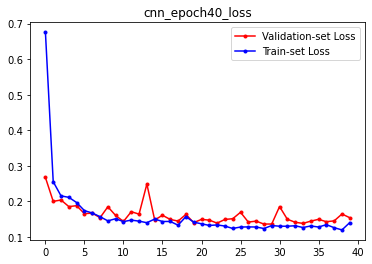

In [310]:
y_vloss = hist2.history['val_loss']
y_loss = hist2.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend()
plt.title('cnn_epoch40_loss')
#plt.savefig('/home/sbml/nicer/220517peak_new/CNN/loss_allpeak.svg')


Text(0.5, 1.0, 'cnn_epoch40_accuracy')

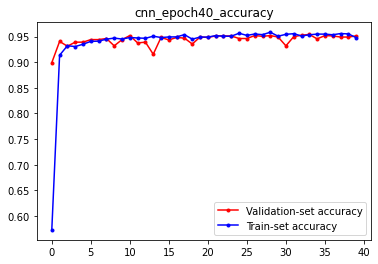

In [311]:
y_vacc = hist2.history['val_accuracy']
y_acc = hist2.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend()
plt.title('cnn_epoch40_accuracy')
#plt.savefig('/home/sbml/nicer/220517peak_new/CNN/acc_allpeak.svg')

In [276]:
#model_cnn.save('/home/sbml/nicer/220517peak_new/CNN/training_TF_ver2.h5')

In [312]:
predict = model_cnn.predict(x_test)

predict_labels = np.argmax(predict, axis = 1)

test_labels = np.argmax(y_test, axis = 1)

In [313]:
cnt = 0
p = []
t = []
for i in range(len(predict_labels)):
    p.append(predict_labels[i])
    t.append(test_labels[i])
    if predict_labels[i] == test_labels[i]:
        cnt = cnt+1

acc = cnt/len(predict_labels)
print('accuracy_test = ', acc)

accuracy_test =  0.955


In [314]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, predict_labels)

array([[314,  19],
       [  8, 259]])

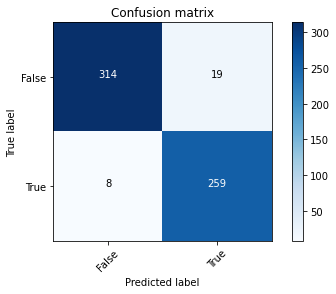

In [315]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

confusion_mtx = confusion_matrix(test_labels, predict_labels)

plot_confusion_matrix(confusion_mtx, classes = ['False', 'True'])